# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 639


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?&units=Metric&APPID={weather_api_key}'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print('City not found. Skipping...')
        pass
      
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ternate
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | araouane
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | samusu
City not found. Skipping...
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | lalpur
Processing Record 12 of Set 1 | tuatapere
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | nyazepetrovsk
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | vardo
Processing Record 17 of Set 1 | okahandja
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | meyungs
City not found. Skipping...
Processing Record 21 of Set 1 | taoudenni

Processing Record 36 of Set 4 | biu
Processing Record 37 of Set 4 | kahului
Processing Record 38 of Set 4 | imamoglu
Processing Record 39 of Set 4 | kristiansund
Processing Record 40 of Set 4 | balkhash
Processing Record 41 of Set 4 | weatherford
Processing Record 42 of Set 4 | zhigansk
Processing Record 43 of Set 4 | hermanus
Processing Record 44 of Set 4 | shitanjing
Processing Record 45 of Set 4 | arbazh
Processing Record 46 of Set 4 | tual
Processing Record 47 of Set 4 | seymchan
Processing Record 48 of Set 4 | egvekinot
Processing Record 49 of Set 4 | griffith
Processing Record 0 of Set 5 | cibakhaza
Processing Record 1 of Set 5 | port alfred
Processing Record 2 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | xiuyan
Processing Record 5 of Set 5 | mehran
Processing Record 6 of Set 5 | formoso do araguaia
City not found. Skipping...
Processing Record 7 of Set 5 | kiama
Processing Record 8 of Set 5 | talnakh


Processing Record 27 of Set 8 | pouebo
Processing Record 28 of Set 8 | temaraia
City not found. Skipping...
Processing Record 29 of Set 8 | nishihara
Processing Record 30 of Set 8 | lerwick
Processing Record 31 of Set 8 | longyearbyen
Processing Record 32 of Set 8 | mahebourg
Processing Record 33 of Set 8 | guadalupe victoria
Processing Record 34 of Set 8 | banyo
Processing Record 35 of Set 8 | duz
City not found. Skipping...
Processing Record 36 of Set 8 | vari
Processing Record 37 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 38 of Set 8 | suntar
Processing Record 39 of Set 8 | evensk
Processing Record 40 of Set 8 | mehamn
Processing Record 41 of Set 8 | verkhoyansk
Processing Record 42 of Set 8 | hovd
Processing Record 43 of Set 8 | safford
Processing Record 44 of Set 8 | mananara
Processing Record 45 of Set 8 | grandview
Processing Record 46 of Set 8 | vawkavysk
Processing Record 47 of Set 8 | bodden town
Processing Record 48 of Set 8 | alcaniz
Processing Recor

Processing Record 15 of Set 12 | sobolevo
Processing Record 16 of Set 12 | police
Processing Record 17 of Set 12 | visby
Processing Record 18 of Set 12 | placido de castro
Processing Record 19 of Set 12 | dorado
Processing Record 20 of Set 12 | matay
Processing Record 21 of Set 12 | saldanha
Processing Record 22 of Set 12 | laiwu
Processing Record 23 of Set 12 | waipawa
Processing Record 24 of Set 12 | dudinka
Processing Record 25 of Set 12 | caravelas
Processing Record 26 of Set 12 | nantucket
Processing Record 27 of Set 12 | poum
Processing Record 28 of Set 12 | nicoya
Processing Record 29 of Set 12 | candelaria
Processing Record 30 of Set 12 | santo domingo
Processing Record 31 of Set 12 | kumluca
Processing Record 32 of Set 12 | shizuishan
Processing Record 33 of Set 12 | adelaide
Processing Record 34 of Set 12 | mount vernon
Processing Record 35 of Set 12 | ryotsu
Processing Record 36 of Set 12 | barguzin
Processing Record 37 of Set 12 | piacabucu
Processing Record 38 of Set 12 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
                            
# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0      ternate   0.8000  127.4000     27.14        78          96        1.88   
1  new norfolk -42.7826  147.0587     24.28        52          11        0.93   
2     araouane  18.9048   -3.5265     19.94        15           1        4.52   
3      mataura -46.1927  168.8643     18.85        40          58        0.54   
4    jamestown  42.0970  -79.2353     -0.55        72         100        4.63   

  Country        Date  
0      ID  1674518676  
1      AU  1674518637  
2      ML  1674518678  
3      NZ  1674518678  
4      US  1674518626

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
0            ternate   0.8000  127.4000     27.14        78          96   
1        new norfolk -42.7826  147.0587     24.28        52          11   
2           araouane  18.9048   -3.5265     19.94        15           1   
3            mataura -46.1927  168.8643     18.85        40          58   
4          jamestown  42.0970  -79.2353     -0.55        72         100   

         Wind Speed Country        Date  
City_ID                                  
0              1.88      ID  1674518676  
1              0.93      AU  1674518637  
2              4.52      ML  1674518678  
3              0.54      NZ  1674518678  
4              4.63      US  1674518626

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

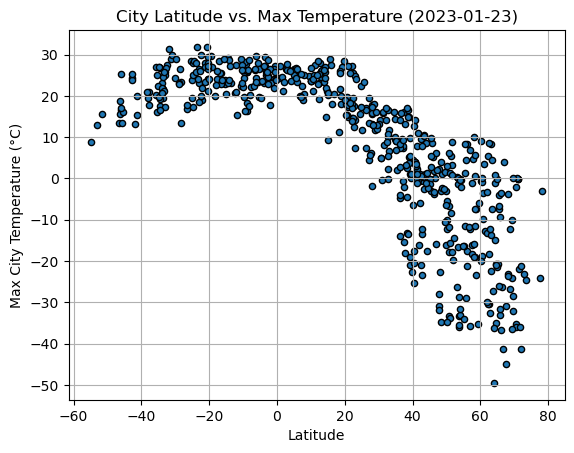

In [3]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', edgecolors = 'k')


# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature (2023-01-23)')
plt.xlabel('Latitude')
plt.ylabel('Max City Temperature (°C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

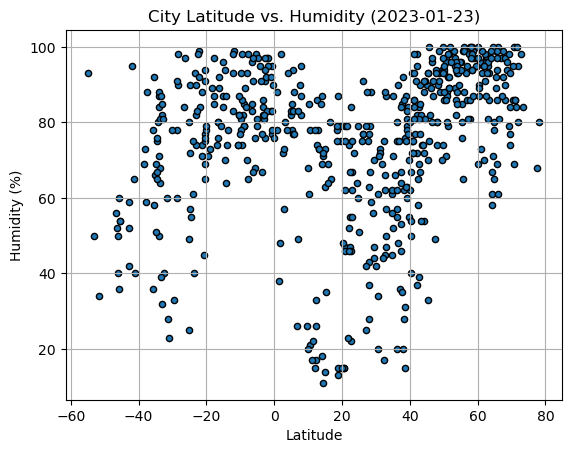

In [4]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', edgecolors = 'k')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity (2023-01-23)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

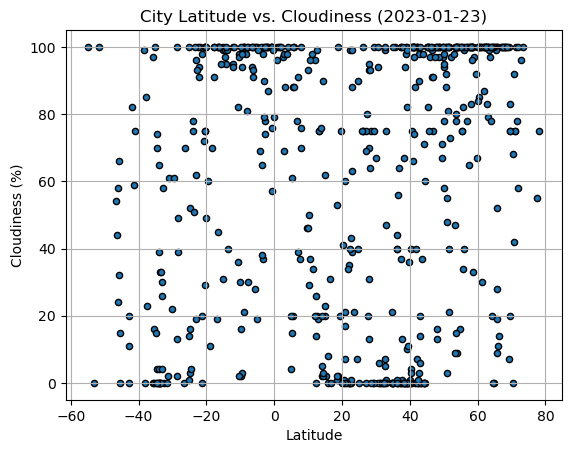

In [5]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', edgecolors = 'k')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (2023-01-23)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

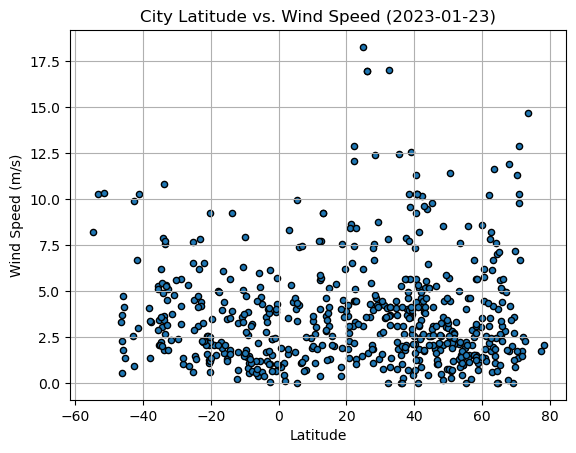

In [6]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', edgecolors = 'k')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed (2023-01-23)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [7]:
# Define a function to create Linear Regression plots
def regression_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values*slope+intercept 
    line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    
    #annotate line equation
    plt.annotate(line_eq, xy=(5,5), xycoords='axes pixels', fontsize=15, color='red')
   
    #print r-value statement
    print(f'The r-value is {rvalue}')

    return slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq

In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                  
0           ternate   0.8000  127.4000     27.14        78          96   
2          araouane  18.9048   -3.5265     19.94        15           1   
4         jamestown  42.0970  -79.2353     -0.55        72         100   
7        butaritari   3.0707  172.7902     26.85        80          88   
8            lalpur  22.2000   69.9667     14.70        52           0   

         Wind Speed Country        Date  
City_ID                                  
0              1.88      ID  1674518676  
2              4.52      ML  1674518678  
4              4.63      US  1674518626  
7              8.30      KI  1674518680  
8              4.48      IN  1674518680

In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
1        new norfolk -42.7826  147.0587     24.28        52          11   
3            mataura -46.1927  168.8643     18.85        40          58   
5             avarua -21.2078 -159.7750     28.03        74          20   
6             faanui -16.4833 -151.7500     25.54        76         100   
9          tuatapere -46.1333  167.6833     16.57        50          24   

         Wind Speed Country        Date  
City_ID                                  
1              0.93      AU  1674518637  
3              0.54      NZ  1674518678  
5              2.57      CK  1674518679  
6              6.10      PF  1674518679  
9              2.30      NZ  1674518681

###  Temperature vs. Latitude Linear Regression Plot

In [10]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

regression_plot(x_values, y_values)

# # Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max City Temperature (°C)')

plt.show()

The r-value is -0.801297367254381


In [11]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

regression_plot(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max City Temperature (°C)')

plt.show()

The r-value is 0.4019316146245037


**Discussion about the linear relationship:** In the northern hemisphere, there is a relatively strong negative association between latitude and max city temperature with an r-value of -.080.  This implies that cities located at a lower positive latitudes correlate to higher max city temperatures and cities located at higher positive latitudes correlate to lower max city temperatures. 

In the southern hemisphere, there is only a weak positive association between latitude and max city temperature with an r-value of 0.40.  This implies that cities located at higher negative latitudes weakly correlate to lower max city temperatures and cities located at lower negative latitudes weakly correlate to higher city temperatures.   

### Humidity vs. Latitude Linear Regression Plot

In [12]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

regression_plot(x_values, y_values)

# # Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()

The r-value is 0.49281256439102544


In [13]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

regression_plot(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()

The r-value is 0.5368782401221885


**Discussion about the linear relationship:** In both the northern and southern hemispheres there is only a weak positive correlation betweeen latitude and percent humidity, with r-values of 0.49 and 0.53 respectively.  

When looking at the plot of latitude vs percent humidity in the northern hemisphere, it appears that the variation in percent humidity is less for higher latitudes than at lower latitudes.  For cities with latitudes of 50 or higher, the percent humidity appears to remain above about 50%.  Whereas when looking at cities with latitudes less than 50, the range of percent humidty values is much greater. 

When looking at the plot of latitude vs percent humidity in the southern hemisphere, similar to observations made in the same plot for the northern hemisphere, the variation in percent humidity is less for lower negative latitudes than at higher negative latitudes.  For cities with latitudes from 0 to about -15, the percent humidity appears to remain above about 60%. Where as cities with greater negative latitude values have a greater range in percent humidity values. 

### Cloudiness vs. Latitude Linear Regression Plot

In [14]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

regression_plot(x_values, y_values)

# # Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

The r-value is 0.3023907815000629


The r-value is 0.4873701902167658


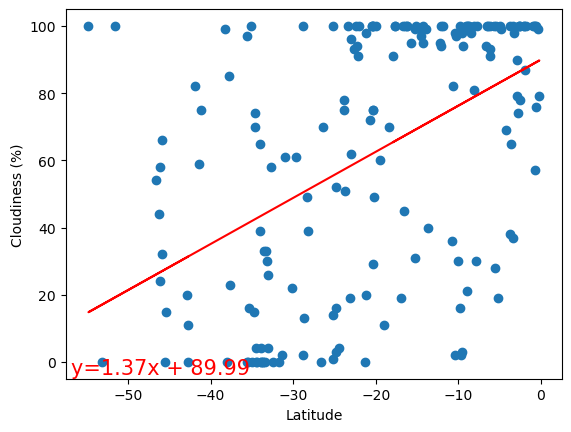

In [15]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

regression_plot(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

**Discussion about the linear relationship:** In both the northern and southern hemispheres there is only a weak positive correlation betweeen latitude and percent humidity, with r-values of 0.30 and 0.49 respectively.

For both the northern and southern hemisphere plots of latitude vs percent cloudiness, there a large distribution of points throughout the plot.  The southern hemisphere plot has a slighlty higher r-value, which results in a slighly higher correlation (when compared to the northern hemisphere values), but the overall correlation is still weak. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.04251559175394028


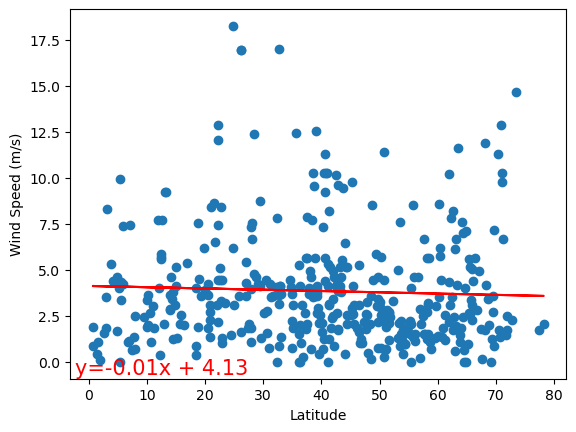

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

regression_plot(x_values, y_values)

# # Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

plt.show()

The r-value is -0.3410192767474595


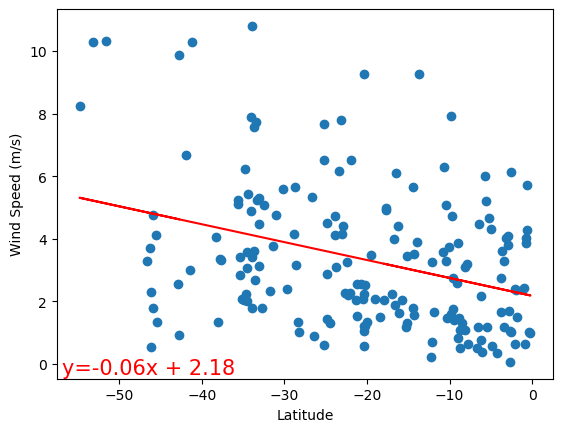

In [17]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

regression_plot(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

plt.show()

**Discussion about the linear relationship:** In both the northern and southern hemispheres there is only a weak negative correlation betweeen latitude and percent humidity, with r-values of -0.04 and -0.34 respectively.

For the nothern hemisphere plot of latitude vs wind speed, the correlation is very weak.  Looking at the plot, with the exception of a few outliers, the majority of the wind speeds plotted are below 15m/s, with the vast majority being below 5m/s. 

For the southern hemisphere plot of latitude vs wind speed, the correlation is slightly higher than that of the northern hemisphere plot, but is still relatively weak.  Looking at th plot, the majority of the wind speeds plotted are below 6m/s, especially those with latitude values between about -45 and 0. 